##### 3.	Import the required packages with their customary aliases.
##### 4.	Use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<hr>

##### 5.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 6 rows.
##### 6. Repeat for the internet use dataset. Call this DataFrame `internet_df`. Take a look at the first six rows.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [5]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
internet_df.head()

##### 98. Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
print('gdp_df has', gdp_df.shape[0], 'rows and', gdp_df.shape[1], 'columns.')

gdp_df has 7176 rows and 4 columns.


In [8]:
print('internet_df has', internet_df.shape[0], 'rows and', internet_df.shape[1], 'columns.')

internet_df has 4495 rows and 4 columns.


<hr>

##### 6.	Take a look at the datatypes for the columns in each DataFrame.

In [9]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

##### 99. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


<hr>

##### 7. Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.

In [13]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [14]:
print('\t\tgdp_df')
print(gdp_df.head())
print ('\n======================================\n')
print('\t\tinternet_df')
print(internet_df.head())

		gdp_df
  Country or Area  Year        Value
0     Afghanistan  2020  1970.560169
1     Afghanistan  2019  2065.036235
2     Afghanistan  2018  2033.804389
3     Afghanistan  2017  2058.400221
4     Afghanistan  2016  2057.067978


		internet_df
  Country or Area  Year     Value
0     Afghanistan  2014  6.390000
1     Afghanistan  2013  5.900000
2     Afghanistan  2012  5.454545
3     Afghanistan  2011  5.000000
4     Afghanistan  2010  4.000000


<hr>

##### 8.	Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.
##### 9.	Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [15]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [16]:
print('\t\tgdp_df')
print(gdp_df.head())
print ('\n======================================\n')
print('\t\tinternet_df')
print(internet_df.head())

		gdp_df
       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


		internet_df
       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


<hr>

##### 10.	Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.

In [17]:
# Perform an outer merge of the two dataframes.
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country', 'Year'], how='outer')

# Sort the merged dataframe
gdp_and_internet_use = gdp_and_internet_use.sort_values(by = ['Country', 'Year'])

# Round GDP_Per_Capita and Internet_Users_Pct to 2 decimals
gdp_and_internet_use['GDP_Per_Capita'] = round(gdp_and_internet_use['GDP_Per_Capita'], 2)
gdp_and_internet_use['Internet_Users_Pct'] = round(gdp_and_internet_use['Internet_Users_Pct'], 3)

In [18]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7177,Afghanistan,1990,NaN,0.000
7176,Afghanistan,2001,NaN,0.005
18,Afghanistan,2002,1189.78,0.005
17,Afghanistan,2003,1235.81,0.088
16,Afghanistan,2004,1200.28,0.106
...,...,...,...,...
7149,Zimbabwe,2016,2341.30,NaN
7148,Zimbabwe,2017,2416.05,NaN
7147,Zimbabwe,2018,2497.14,NaN
7146,Zimbabwe,2019,2310.63,NaN


<hr>

##### 11.	Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [19]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7177,Afghanistan,1990,NaN,0.000
7176,Afghanistan,2001,NaN,0.005
18,Afghanistan,2002,1189.78,0.005
17,Afghanistan,2003,1235.81,0.088
16,Afghanistan,2004,1200.28,0.106


<hr>

##### 12.	Look at the last five rows to make sure the data is clean and as expected.

In [20]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7149,Zimbabwe,2016,2341.30,NaN
7148,Zimbabwe,2017,2416.05,NaN
7147,Zimbabwe,2018,2497.14,NaN
7146,Zimbabwe,2019,2310.63,NaN
7145,Zimbabwe,2020,2134.56,NaN


<hr>

##### 13.	Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [21]:
gdp_and_internet_subset = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]

In [22]:
cnt = len(gdp_and_internet_subset.loc[gdp_and_internet_subset['Year'].isin([2004, 2009, 2014])])
assert cnt == gdp_and_internet_subset.shape[0]
gdp_and_internet_subset

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
16,Afghanistan,2004,1200.28,0.106
11,Afghanistan,2009,1758.90,3.550
6,Afghanistan,2014,2102.38,6.390
35,Africa Eastern and Southern,2004,3093.22,NaN
30,Africa Eastern and Southern,2009,3461.68,NaN
...,...,...,...,...
7125,Zambia,2009,2917.52,6.310
7120,Zambia,2014,3450.04,17.340
7161,Zimbabwe,2004,1979.20,6.564
7156,Zimbabwe,2009,1536.03,11.360


<hr>

##### 14.	Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [23]:
gdp_internet_2004 = gdp_and_internet_subset.loc[(gdp_and_internet_subset['Year'] == 2004)]
gdp_internet_2009 = gdp_and_internet_subset.loc[(gdp_and_internet_subset['Year'] == 2009)]
gdp_internet_2014 = gdp_and_internet_subset.loc[(gdp_and_internet_subset['Year'] == 2014)]

In [24]:
gdp_internet_2004

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
16,Afghanistan,2004,1200.28,0.106
35,Africa Eastern and Southern,2004,3093.22,NaN
66,Africa Western and Central,2004,3165.09,NaN
97,Albania,2004,7580.14,2.420
128,Algeria,2004,10058.43,4.634
...,...,...,...,...
7072,West Bank and Gaza,2004,4485.53,NaN
7099,World,2004,12130.60,NaN
8246,Yemen,2004,NaN,0.881
7130,Zambia,2004,2261.77,2.014


<hr>

##### 15.	Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [25]:
highest_user_2014 = gdp_internet_2014[['Country', 'Year', 'Internet_Users_Pct']].sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)
print(highest_user_2014['Country'].item(), 'had the highest percentage of internet users in', highest_user_2014['Year'].item(), 'with', highest_user_2014['Internet_Users_Pct'].item(), '%')

Iceland had the highest percentage of internet users in 2014 with 98.16 %


Answer: Iceland had the highest percentage of internet users in 2014 with 98.16 %

<hr>

##### 16.	Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [26]:
lowest_user_2014 = gdp_internet_2014[['Country', 'Year', 'Internet_Users_Pct']].sort_values(by = 'Internet_Users_Pct').head(1)
print(lowest_user_2014['Country'].item(), 'had the lowest percentage of internet users in', lowest_user_2014['Year'].item(), 'with', lowest_user_2014['Internet_Users_Pct'].item(), '%')

Dem. People's Rep. of Korea had the lowest percentage of internet users in 2014 with 0.0 %


Answer: Dem. People's Rep. of Korea had the lowest percentage of internet users in 2014 with 0.0 %

<hr>

##### 17.	Repeat for 2004 and 2009.

In [27]:
highest_2004 = gdp_internet_2004[['Country', 'Year', 'Internet_Users_Pct']].sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)
lowest_2004 = gdp_internet_2004[['Country', 'Year', 'Internet_Users_Pct']].sort_values(by = 'Internet_Users_Pct').head(1)
highest_2009 = gdp_internet_2009[['Country', 'Year', 'Internet_Users_Pct']].sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)
lowest_2009 = gdp_internet_2009[['Country', 'Year', 'Internet_Users_Pct']].sort_values(by = 'Internet_Users_Pct').head(1)

print(highest_2004['Country'].item(), 'had the highest percentage of internet users in', highest_2004['Year'].item(), 'with', highest_2004['Internet_Users_Pct'].item(), '%')
print(highest_2009['Country'].item(), 'had the highest percentage of internet users in', highest_2009['Year'].item(), 'with', highest_2009['Internet_Users_Pct'].item(), '%')
print(lowest_2004['Country'].item(), 'had the lowest percentage of internet users in', lowest_2004['Year'].item(), 'with', round(lowest_2004['Internet_Users_Pct'].item(), 2), '%')
print(lowest_2009['Country'].item(), 'had the lowest percentage of internet users in', lowest_2009['Year'].item(), 'with', round(lowest_2009['Internet_Users_Pct'].item(), 2), '%')

Sweden had the highest percentage of internet users in 2004 with 83.89 %
Iceland had the highest percentage of internet users in 2009 with 93.0 %
Dem. People's Rep. of Korea had the lowest percentage of internet users in 2004 with 0.0 %
Dem. People's Rep. of Korea had the lowest percentage of internet users in 2009 with 0.0 %


Answer: Sweden had the highest percentage of internet users in 2004 with 83.89 %. 
Iceland had the highest percentage of internet users in 2009 with 93.0 %. 
Dem. People's Rep. of Korea had the lowest percentage of internet users in 2004 with 0.0 %. 
Dem. People's Rep. of Korea had the lowest percentage of internet users in 2009 with 0.0 %. 

<hr>

##### 18.	Which country had the highest gdp per capita in 2014? What was the gdp per capita?
#####  20.	Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [28]:
highest_gdp_2014 = gdp_internet_2014[['Country', 'Year', 'GDP_Per_Capita']].sort_values(by = 'GDP_Per_Capita', ascending = False).head(1)
lowest_gdp_2014 = gdp_internet_2014[['Country', 'Year', 'GDP_Per_Capita']].sort_values(by = 'GDP_Per_Capita').head(1)

print(highest_gdp_2014['Country'].item(), 'had the highest GDP per capita in', highest_gdp_2014['Year'].item(), 'with', highest_gdp_2014['GDP_Per_Capita'].item())
print(lowest_gdp_2014['Country'].item(), 'had the lowest GDP per capita in', lowest_gdp_2014['Year'].item(), 'with', lowest_gdp_2014['GDP_Per_Capita'].item())

Macao SAR, China had the highest GDP per capita in 2014 with 155201.74
Central African Republic had the lowest GDP per capita in 2014 with 822.61


Answer: Macao SAR, China had the highest GDP per capita in 2014 with 155201.74. Central African Republic had the lowest GDP per capita in 2014 with 822.61

<hr>

##### 21.	Create some scatterplots:  
    a. 2004 Percent Using the Internet vs GDP Per Capita  
    b. 2009 Percent Using the Internet vs GDP Per Capita  
    c. 2014 Percent Using the Internet vs GDP Per Capita  

Text(0, 0.5, 'GDP Per Capita')

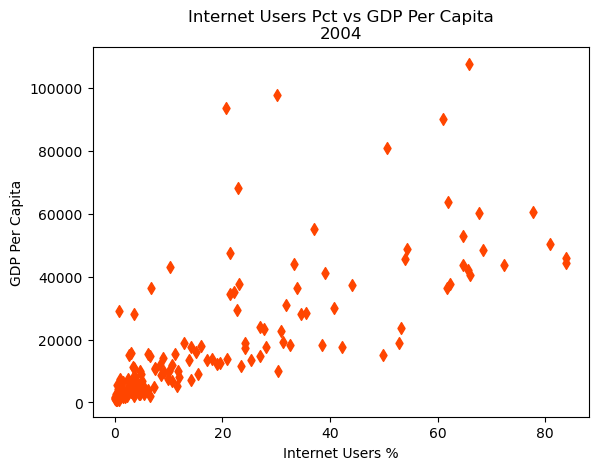

In [29]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = gdp_internet_2004, marker = 'd', color = 'orangered')
plt.title("Internet Users Pct vs GDP Per Capita\n2004")
plt.xlabel("Internet Users %")
plt.ylabel("GDP Per Capita")

Text(0, 0.5, 'GDP Per Capita')

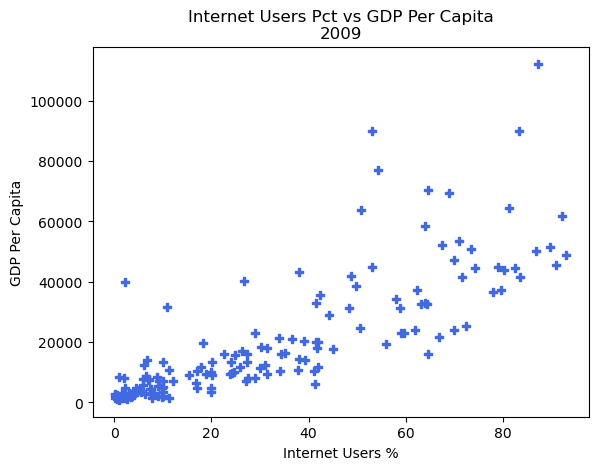

In [30]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = gdp_internet_2009, marker = 'P', color = 'royalblue')
plt.title("Internet Users Pct vs GDP Per Capita\n2009")
plt.xlabel("Internet Users %")
plt.ylabel("GDP Per Capita")

Text(0, 0.5, 'GDP Per Capita')

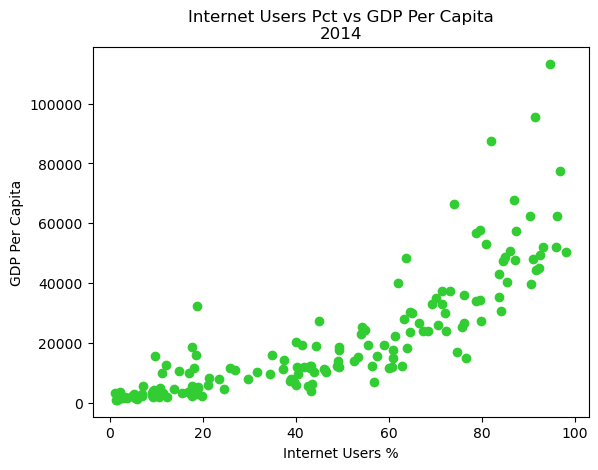

In [31]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = gdp_internet_2014, marker = 'o', color = 'limegreen')
plt.title("Internet Users Pct vs GDP Per Capita\n2014")
plt.xlabel("Internet Users %")
plt.ylabel("GDP Per Capita")

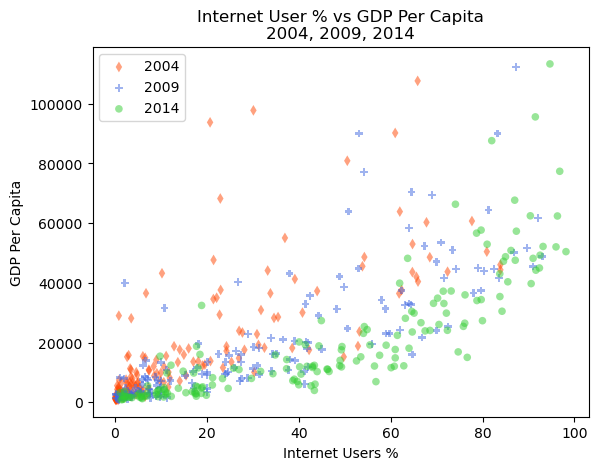

In [32]:
# Show each scatterplot on the same graph
#
# Code variable context:
# gdp_and_internet_subset = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]
# gdp_internet_2004 = gdp_and_internet_subset.loc[(gdp_and_internet_subset['Year'] == 2004)]
# gdp_internet_2009 = gdp_and_internet_subset.loc[(gdp_and_internet_subset['Year'] == 2009)]
# gdp_internet_2014 = gdp_and_internet_subset.loc[(gdp_and_internet_subset['Year'] == 2014)]
#

data_2004 = (list(gdp_internet_2004['Internet_Users_Pct']), list(gdp_internet_2004['GDP_Per_Capita']))
data_2009 = (list(gdp_internet_2009['Internet_Users_Pct']), list(gdp_internet_2009['GDP_Per_Capita']))
data_2014 = (list(gdp_internet_2014['Internet_Users_Pct']), list(gdp_internet_2014['GDP_Per_Capita']))

data_tuple = (data_2004, data_2009, data_2014)
colors = ('orangered', 'royalblue', 'limegreen')
markers = ('d', 'P', 'o')
groups = (2004, 2009, 2014)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, clr, mrk, group in zip(data_tuple, colors, markers, groups):
    x, y = data
    ax.scatter(x, y, alpha = 0.5, color = clr, marker = mrk, edgecolors = 'none', s = 30, label = group)

plt.title('Internet User % vs GDP Per Capita\n2004, 2009, 2014')
plt.xlabel("Internet Users %")
plt.ylabel("GDP Per Capita")
plt.legend(loc = 2)

##### 22.	Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Answer: There is a loose positive correlation between the % of internet users and GDP per capita. There is less of a correlation in 2004 between the two variables compared to 10 years later in 2014 where there is a much stronger positive correlation between the two variables. Also, in 2004, quite a few countries that have a very high GDP per capita also have a very low % of internet users.

<hr>

##### 23.	Look at the distribution of gdp per capita values for 2014. Is it unimodal?

Text(0, 0.5, 'Number of Countries')

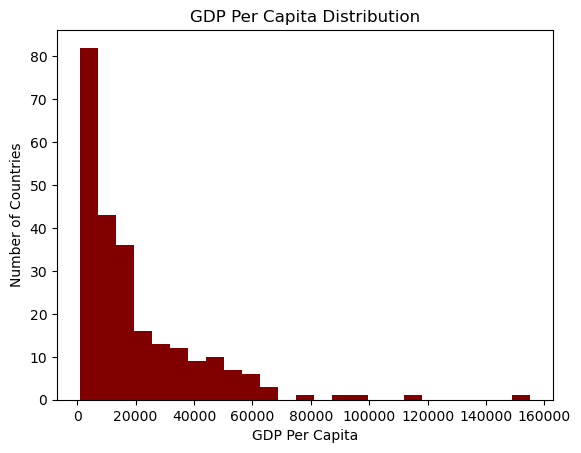

In [33]:
x = list(gdp_internet_2014['GDP_Per_Capita'])
plt.hist(x, color = 'maroon', bins = 25)
plt.title('GDP Per Capita Distribution')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Countries')

Answer: The GDP per capita values for 2014 show a unimodal distribution.

Text(0, 0.5, 'Number of Countries')

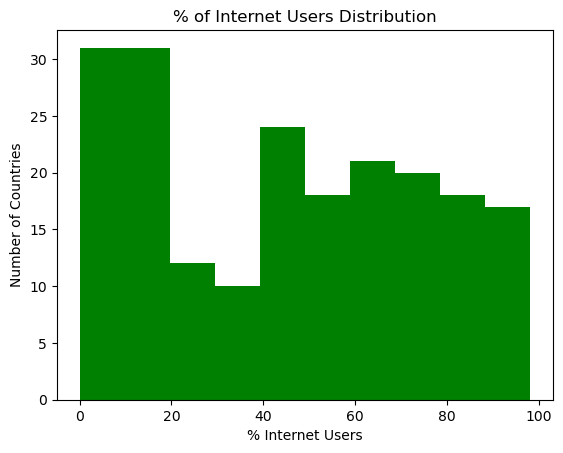

In [34]:
x = list(gdp_internet_2014['Internet_Users_Pct'])
plt.hist(x, color = 'green', bins = 10)
plt.title('% of Internet Users Distribution')
plt.xlabel('% Internet Users')
plt.ylabel('Number of Countries')

Answer: The values for the percentage of internet users for 2014 show a bimodal distribution.

<hr>

##### 25.	What are the top 5 countries in terms of internet use in 2014?

In [35]:
top_5_internet_2014 = gdp_internet_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head()
top_5_internet_2014 = list(top_5_internet_2014['Country'])
print('The top 5 countries for internet use in 2014 are {}.'.format(' and '.join([', '.join(top_5_internet_2014[:-1]), top_5_internet_2014[-1]])))

The top 5 countries for internet use in 2014 are Iceland, Bermuda, Norway, Denmark and Andorra.


Answer: The top 5 countries for internet use in 2014 are Iceland, Bermuda, Norway, Denmark and Andorra.

<hr>

##### 26.	Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [36]:
top_5_internet = gdp_and_internet_subset.loc[gdp_and_internet_subset['Country'].isin(top_5_internet_2014)]

In [37]:
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7189,Andorra,2004,NaN,26.838
7184,Andorra,2009,NaN,78.530
7179,Andorra,2014,NaN,95.900
655,Bermuda,2004,90195.81,60.991
650,Bermuda,2009,89961.98,83.250
645,Bermuda,2014,77361.10,96.800
1571,Denmark,2004,50446.54,80.930
1566,Denmark,2009,50114.05,86.840
1561,Denmark,2014,52048.34,95.990
2813,Iceland,2004,46051.74,83.880


<hr>

##### 27.	Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

Text(0.5, 1.0, 'Internet Use Trend\n2004, 2009, 2014')

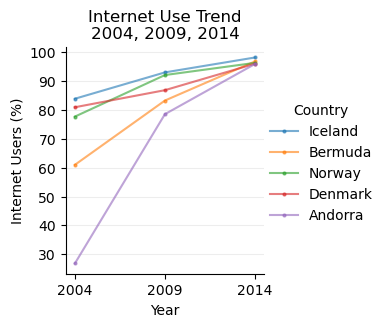

In [38]:
g = sns.FacetGrid(top_5_internet, hue = 'Country', hue_order = top_5_internet_2014)
g.map(plt.plot, 'Year', 'Internet_Users_Pct', marker = 'o', markersize = 2, alpha = 0.6).add_legend()
plt.xticks([2004, 2009, 2014])
plt.grid(True, axis = 'y', color='0.9')
plt.ylabel('Internet Users (%)')
plt.title('Internet Use Trend\n2004, 2009, 2014')

Answer: The country with the greatest growth of internet users from 2004 to 2014 is Andorra.

<hr>

##### 28.	Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [39]:
gdp_internet_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.38,6.39
25,Africa Eastern and Southern,2014,3677.32,NaN
56,Africa Western and Central,2014,4215.65,NaN
87,Albania,2014,11586.83,60.10
118,Algeria,2014,11512.69,18.09
...,...,...,...,...
7062,West Bank and Gaza,2014,5967.07,NaN
7089,World,2014,15224.44,NaN
8236,Yemen,2014,NaN,22.55
7120,Zambia,2014,3450.04,17.34


In [83]:
bottom_5_internet_2014 = gdp_internet_2014[['Country', 'Internet_Users_Pct']].sort_values(by='Internet_Users_Pct').head()
bottom_5_internet_2014 = list(bottom_5_internet_2014['Country'])
bottom_5_internet = gdp_and_internet_subset.loc[gdp_and_internet_subset['Country'].isin(bottom_5_internet_2014)]
#bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
930,Burundi,2004,817.46,0.349
925,Burundi,2009,831.56,0.900
920,Burundi,2014,886.24,1.380
7403,Dem. People's Rep. of Korea,2004,NaN,0.000
7398,Dem. People's Rep. of Korea,2009,NaN,0.000
7394,Dem. People's Rep. of Korea,2014,NaN,0.000
7457,Eritrea,2009,NaN,0.540
7452,Eritrea,2014,NaN,0.990
8011,Somalia,2004,NaN,1.053
8006,Somalia,2009,NaN,1.161


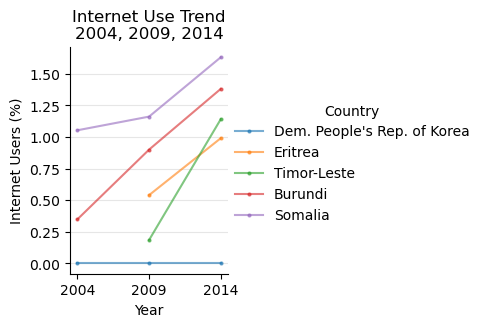

In [89]:
g2 = sns.FacetGrid(bottom_5_internet, hue = 'Country', hue_order = bottom_5_internet_2014)
g2.map(plt.plot, 'Year', 'Internet_Users_Pct', marker = 'o', markersize = 2, alpha = 0.6).add_legend()
plt.xticks([2004, 2009, 2014])
plt.ylabel('Internet Users (%)')
plt.title('Internet Use Trend\n2004, 2009, 2014')
plt.grid(True, axis = 'y', color = '0.9')

Answer: Dem. People's Rep. of Korea has had the consistently lowest % of internet users.

<hr>

##### 29.	Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [84]:
top_5_gdp_2014 = gdp_internet_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head()
top_5_gdp_2014 = list(top_5_gdp_2014['Country'])
top_5_gdp = gdp_and_internet_subset[gdp_and_internet_subset['Country'].isin(top_5_gdp_2014)]
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
655,Bermuda,2004,90195.81,60.991
650,Bermuda,2009,89961.98,83.250
645,Bermuda,2014,77361.10,96.800
3898,Luxembourg,2004,107634.84,65.880
3893,Luxembourg,2009,112230.08,87.310
3888,Luxembourg,2014,113313.58,94.670
3929,"Macao SAR, China",2004,73322.93,NaN
3924,"Macao SAR, China",2009,96493.79,NaN
3919,"Macao SAR, China",2014,155201.74,NaN
5397,Qatar,2004,93748.55,20.702


Text(86.60220196759259, 0.5, 'GDP Per Capita')

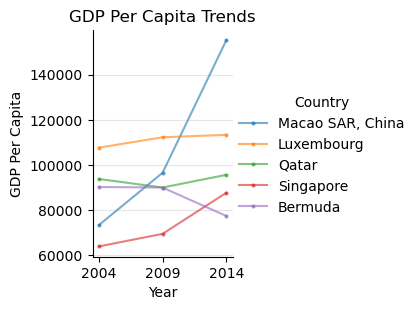

In [91]:
g3 = sns.FacetGrid(top_5_gdp, hue = 'Country', hue_order = top_5_gdp_2014)
g3.map(plt.plot, 'Year', 'GDP_Per_Capita', marker = 'o', markersize = 2, alpha = 0.6).add_legend()
plt.xticks([2004, 2009, 2014])
plt.grid(True, axis = 'y', color = '0.9')
plt.title('GDP Per Capita Trends')
plt.ylabel('GDP Per Capita')

<hr>

##### 96. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [100]:
bottom_5_gdp_2014 = gdp_internet_2014[['Country', 'GDP_Per_Capita']].sort_values(by='GDP_Per_Capita').head()
bottom_5_gdp_2014 = list(bottom_5_gdp_2014['Country'])
print(bottom_5_gdp_2014)
bottom_5_gdp = gdp_and_internet_subset.loc[gdp_and_internet_subset['Country'].isin(bottom_5_gdp_2014)]
bottom_5_gdp

['Central African Republic', 'Burundi', 'Somalia', 'Dem. Rep. Congo', 'Niger']


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
930,Burundi,2004,817.46,0.349
925,Burundi,2009,831.56,0.900
920,Burundi,2014,886.24,1.380
1152,Central African Republic,2004,1037.84,NaN
1147,Central African Republic,2009,1161.19,NaN
1142,Central African Republic,2014,822.61,NaN
1540,Dem. Rep. Congo,2004,757.69,NaN
1535,Dem. Rep. Congo,2009,835.61,NaN
1530,Dem. Rep. Congo,2014,1029.79,NaN
4766,Niger,2004,929.22,0.190


Text(87.1147663483796, 0.5, 'GDP Per Capita')

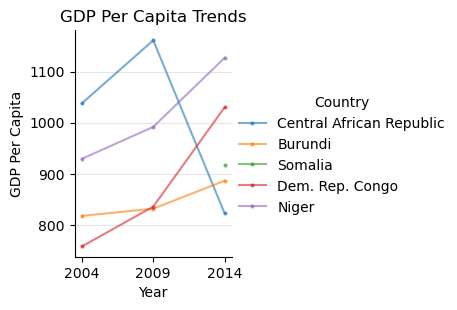

In [101]:
g4 = sns.FacetGrid(bottom_5_gdp, hue = 'Country', hue_order = bottom_5_gdp_2014)
g4.map(plt.plot, 'Year', 'GDP_Per_Capita', marker = 'o', markersize = 2, alpha = 0.6).add_legend()
plt.xticks([2004, 2009, 2014])
plt.grid(True, axis = 'y', color = '0.9')
plt.title('GDP Per Capita Trends')
plt.ylabel('GDP Per Capita')

<hr>

##### 30.	Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

Answer:
>Macao, China had a notable increase in GDP per capita around 2009 compared to the other countries. A possible reason for this is the construction of several mega-resorts in Macao which brought in increased revenue from gambling.

>Central African Republic had a notable decrease in GDP per capita from 2009 to 2014 compared to the other countries, which saw only an increase after 2009. Possible causes of CAR's decline: the fall of its north and central regions to rebel armies in 2012 and the fall of its capital in 2013 followed by occupation of the region by the new regime.

>Somalia is missing GDP data. Possible reasons for Somalia's lack of data from 1991-2012: its government was overthrown in 1991 by opposition groups and it wasn't until 2012 that the country instituted a permanent central government.